# SUPPORT VECTOR REGRESSION

IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

LOADING DATASET

In [3]:
dataset= pd.read_csv ('/content/drive/My Drive/data/Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


EXTRACTING COLUMNS VALUES AND TYPECASTING IT AS FLOAT

In [6]:
x=dataset.iloc[:,1:2].values.astype(float)
y=dataset.iloc[:,2:3].values.astype(float)
print(x)
print(y)


[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


FEATURE SCALING FOR MINIMIZING VALUES

In [8]:
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

VISUALIZING DATA

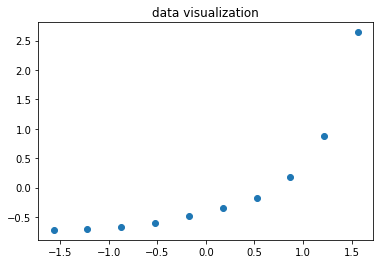

In [10]:
plt.scatter(x,y)
plt.title('data visualization')
plt.show()

TRAINING THE MODEL

In [11]:
model=SVR(kernel='rbf')
model.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

VISUALIZING THE TRAINED MODEL

<function matplotlib.pyplot.show>

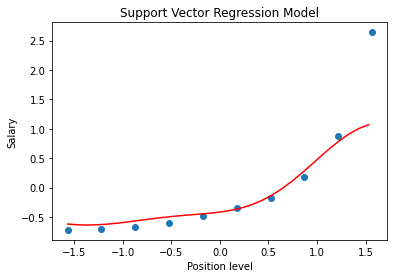

In [27]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(x,y)
plt.plot(x_grid,model.predict(x_grid),color='r')
plt.title('Support Vector Regression Model')
plt.xlabel("Position level")
plt.ylabel("Salary")

plt.show

PREDICTION

In [28]:
y_pred = sc_y.inverse_transform ((model.predict(sc_x.transform(np.array([[12]])))))
y_pred

array([0.01150915])

# COMPARISON WITH POLYNOMIAL REGRESSION

IMPORTING LIBRARY AND TRANSFORMING DATA

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x)
poly.fit(x_poly, y)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

TRAINING MODEL WITH POLYNOMIAL REGRESSSION

In [33]:
from sklearn.linear_model import LinearRegression
polymodel = LinearRegression()
polymodel.fit(x_poly,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

VISUALIZING

Text(0, 0.5, 'salary')

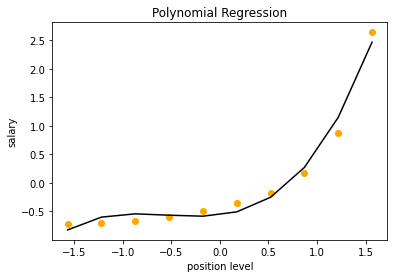

In [34]:
plt.scatter(x,y, color = 'orange')
plt.plot(x,polymodel.predict(poly.fit_transform(x)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('position level')
plt.ylabel('salary')